In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [109]:
data = pd.read_csv("../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [110]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200


In [111]:
data.Category.astype('category')

0           MISSING PERSON
1                 WARRANTS
2          SECONDARY CODES
3           OTHER OFFENSES
4          SECONDARY CODES
                ...       
2215019     MISSING PERSON
2215020      VEHICLE THEFT
2215021     OTHER OFFENSES
2215022      LARCENY/THEFT
2215023     OTHER OFFENSES
Name: Category, Length: 2215024, dtype: category
Categories (39, object): [ARSON, ASSAULT, BAD CHECKS, BRIBERY, ..., VANDALISM, VEHICLE THEFT, WARRANTS, WEAPON LAWS]

### Report the total number of crimes in the dataset

In [112]:
len(data.IncidntNum.unique())

1746914

### List the various categories of crime

In [113]:
data.Category.unique()

array(['MISSING PERSON', 'WARRANTS', 'SECONDARY CODES', 'OTHER OFFENSES',
       'LARCENY/THEFT', 'FORGERY/COUNTERFEITING', 'ASSAULT',
       'DRUG/NARCOTIC', 'NON-CRIMINAL', 'BURGLARY', 'VANDALISM',
       'DRUNKENNESS', 'ROBBERY', 'VEHICLE THEFT', 'KIDNAPPING', 'FRAUD',
       'PROSTITUTION', 'DISORDERLY CONDUCT', 'STOLEN PROPERTY',
       'RECOVERED VEHICLE', 'LIQUOR LAWS', 'WEAPON LAWS',
       'SUSPICIOUS OCC', 'TRESPASS', 'EMBEZZLEMENT', 'RUNAWAY',
       'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES, FORCIBLE',
       'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE', 'SUICIDE',
       'FAMILY OFFENSES', 'ARSON', 'LOITERING', 'GAMBLING', 'BRIBERY',
       'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'], dtype=object)

In [114]:
len(data.Category.unique())

39

### List the number of crimes in each category

In [115]:
data.groupby('Category').count()['IncidntNum']

Category
ARSON                            3931
ASSAULT                        194694
BAD CHECKS                        925
BRIBERY                           813
BURGLARY                        91543
DISORDERLY CONDUCT              10040
DRIVING UNDER THE INFLUENCE      5672
DRUG/NARCOTIC                  119628
DRUNKENNESS                      9826
EMBEZZLEMENT                     2988
EXTORTION                         741
FAMILY OFFENSES                  1183
FORGERY/COUNTERFEITING          23050
FRAUD                           41542
GAMBLING                          348
KIDNAPPING                       5346
LARCENY/THEFT                  480448
LIQUOR LAWS                      4083
LOITERING                        2430
MISSING PERSON                  64961
NON-CRIMINAL                   238323
OTHER OFFENSES                 309358
PORNOGRAPHY/OBSCENE MAT            59
PROSTITUTION                    16701
RECOVERED VEHICLE                8716
ROBBERY                         55867
RUN

### Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?

In [116]:
cat_inc = data.groupby('Category').count()['IncidntNum']

### Create a histogram over crime occurrences.

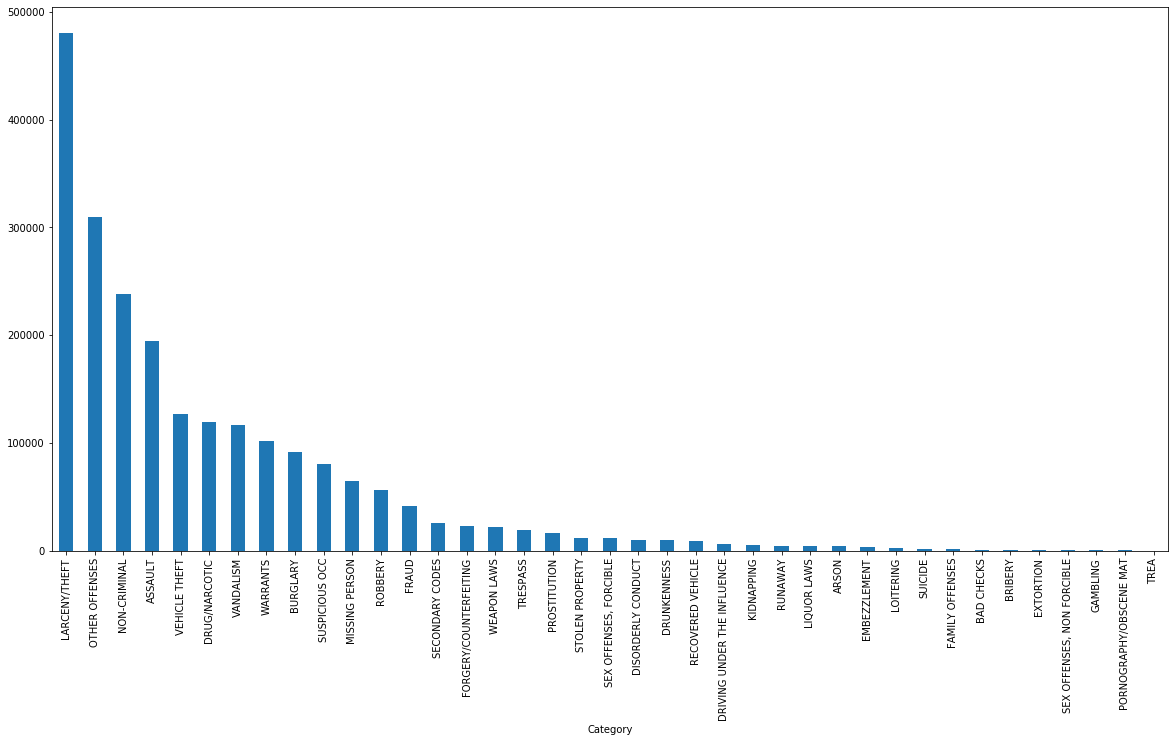

In [117]:
cat_inc.sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

### Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2017 (since we don't have full data for 2018). What's the average number of crimes per year?

In [118]:
data.Date = pd.to_datetime(data.Date)

In [119]:
data[data.Date.dt.year != 2018][['Date','IncidntNum']].groupby(data.Date.dt.year).nunique()\
        .IncidntNum.mean()

114097.86666666667

### Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

In [120]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

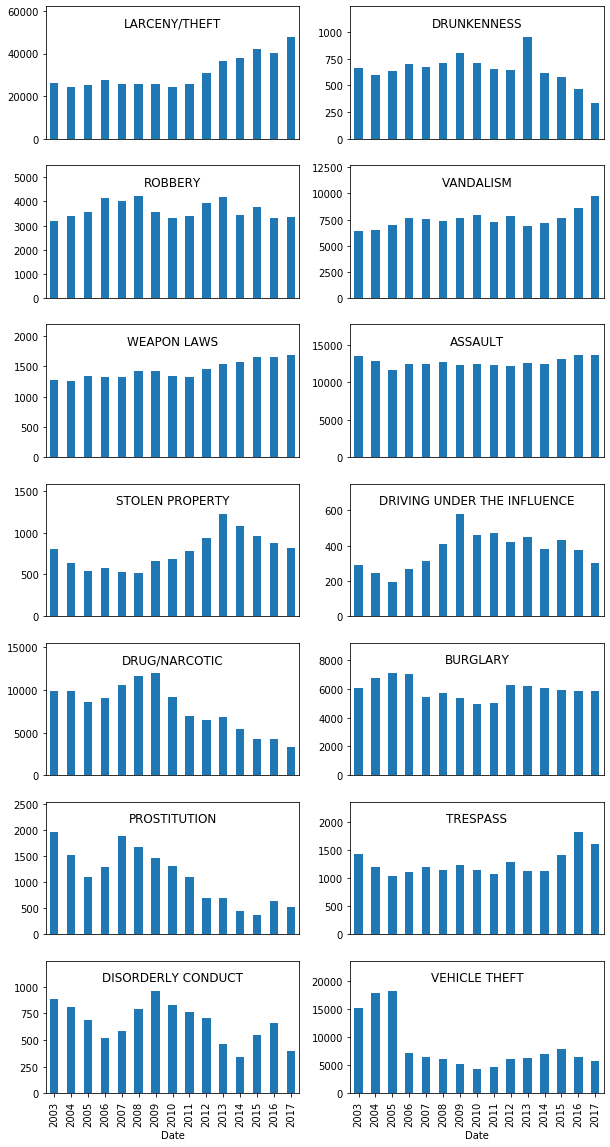

In [121]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Date.dt.year != 2018) & (data.Category == crime)]\
    .groupby(data.Date.dt.year).count().IncidntNum\
    .plot(ax=axi, kind='bar')
    

### Now just count up what happens during each weekday

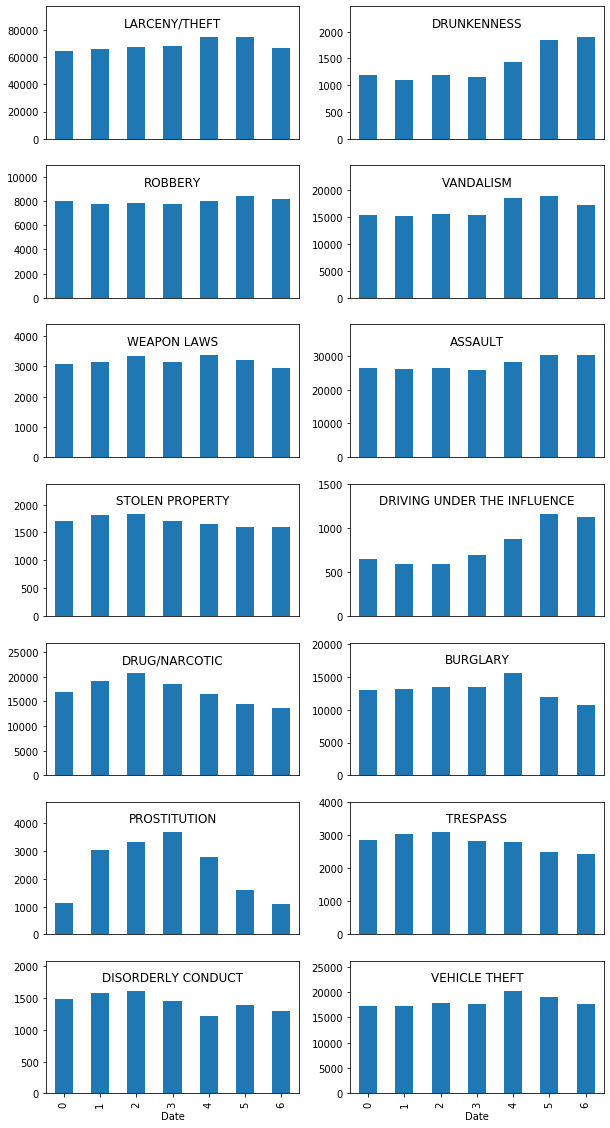

In [122]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Category == crime)]\
    .groupby(data.Date.dt.dayofweek).count().IncidntNum\
    .plot(ax=axi, kind='bar')

#### The months. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec

In [123]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']

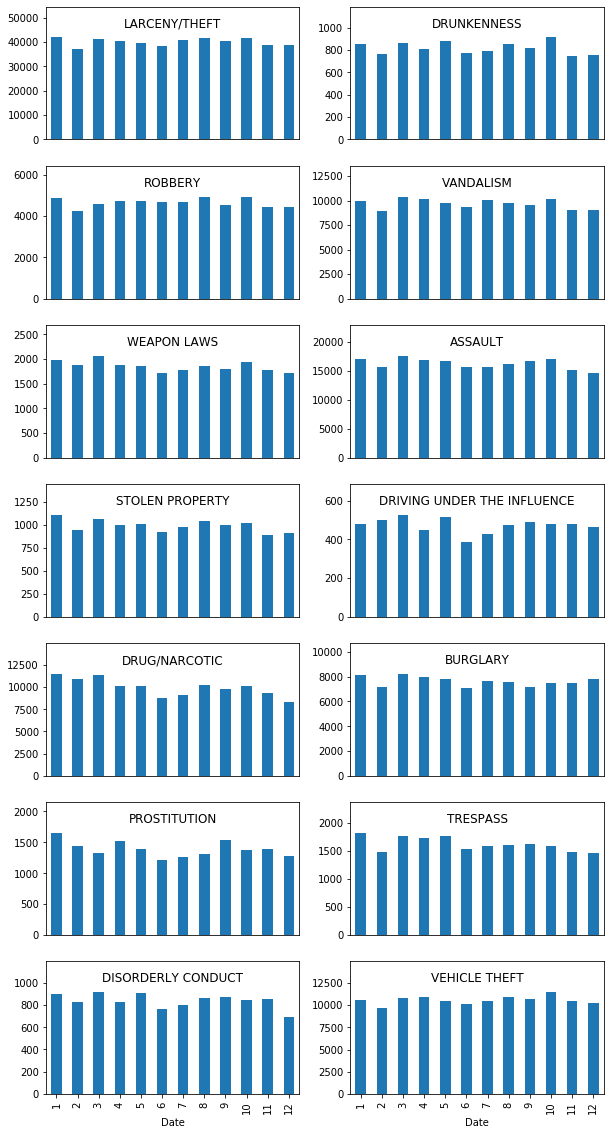

In [124]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    #axi.set_xticklabels(months)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Category == crime)]\
    .groupby(data.Date.dt.month).count().IncidntNum\
    .plot(ax=axi, kind='bar')

There is a drop of crimes in the months of May and June for some categories. May be due to the fact that days are longer and brighter and this prevents some of these crimes from happening since they often happen at night

### The 24 hour cycle. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on.

In [125]:
data['Hour'] = pd.to_datetime(data.Time).dt.hour
data['DayOfWeek'] = data.Date.dt.dayofweek
data['Minutes'] = pd.to_datetime(data.Time).dt.minute

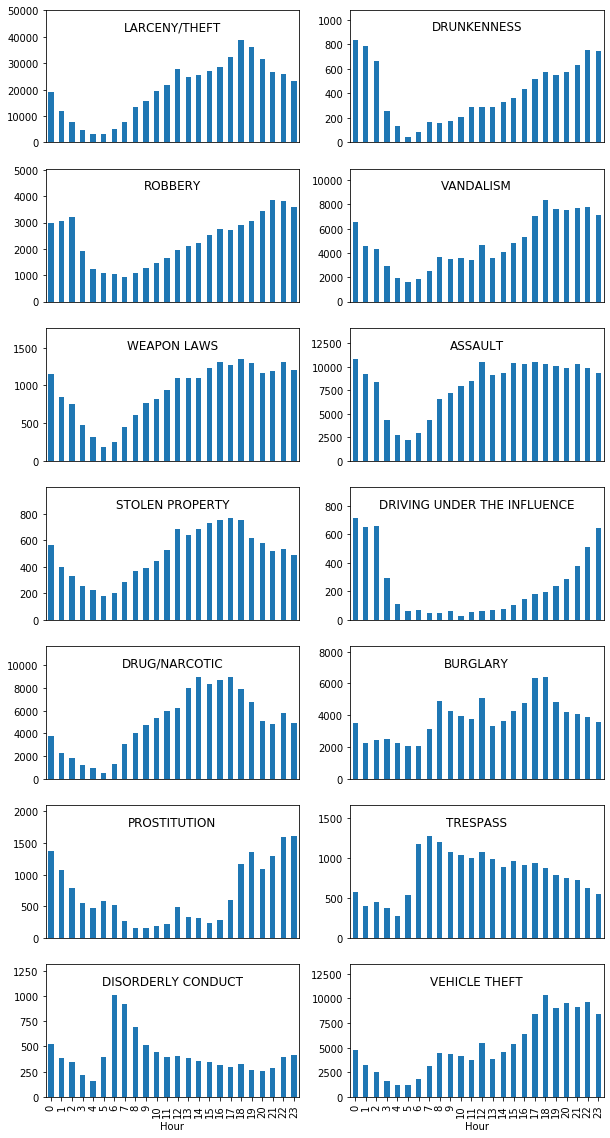

In [126]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    #axi.set_xticklabels(months)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    data[(data.Category == crime)]\
    .groupby(data.Hour).count().IncidntNum\
    .plot(ax=axi, kind='bar')

As expected many crimes happen more frequently during night hours.
Disorderly conduct and Trespass are a slight exception to this
but it may be due to the fact that people tend to conduct in a disordered way
after early in the morning after being out the whole night

### Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

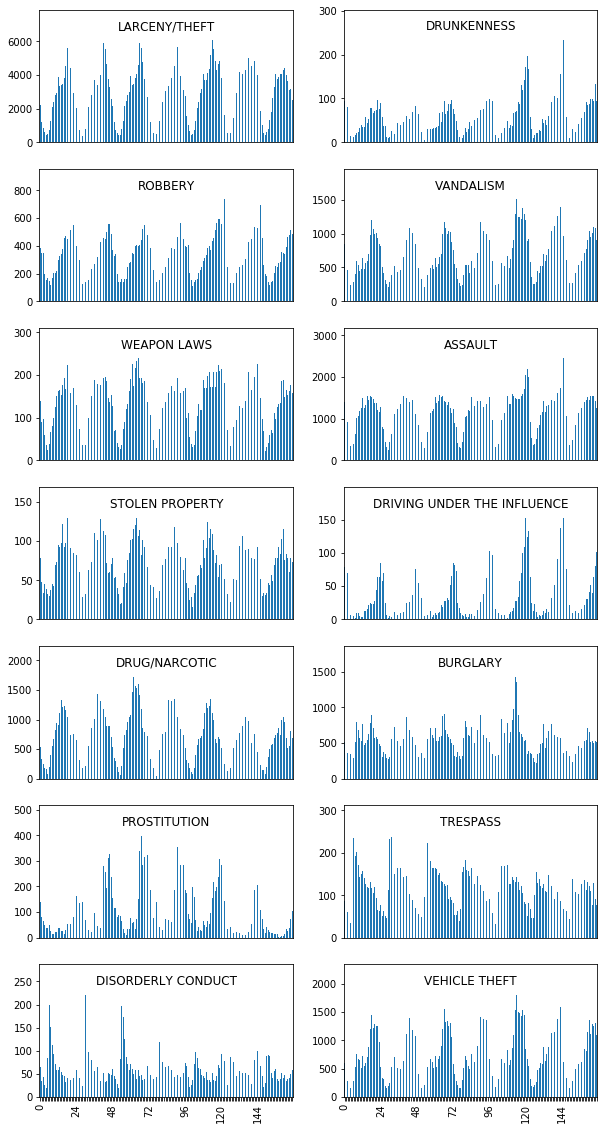

In [127]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7, i%2]
    if i%7 != 6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.3)
    d = data[(data.Category == crime)].groupby(['DayOfWeek','Hour'])\
        .count().IncidntNum.reset_index().IncidntNum
    d.plot(ax=axi, kind='bar')
    # Show only the beginning of the dat
    for i, t in enumerate(axi.get_xticklabels()):
        if (i % 24) != 0:
            t.set_visible(False)

#### First, simply list the names of SF's 10 police districts.

In [128]:
pddistricts = data.dropna().PdDistrict.unique()
pddistricts

array(['TARAVAL', 'SOUTHERN', 'PARK', 'MISSION', 'NORTHERN', 'BAYVIEW',
       'RICHMOND', 'CENTRAL', 'INGLESIDE', 'TENDERLOIN'], dtype=object)

#### Which has the most crimes?

In [129]:
data.groupby('PdDistrict').count().IncidntNum.idxmax()

'SOUTHERN'

#### Which has the most focus crimes?

In [130]:
data[(data.Category.isin(focuscrimes))].groupby('PdDistrict')\
    .count().IncidntNum.idxmax()

'SOUTHERN'

#### First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole

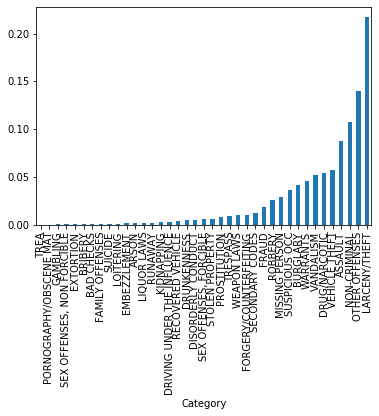

In [163]:
pcrime = (data.groupby('Category').count().IncidntNum / data.count().IncidntNum)
pcrime.sort_values().plot(kind='bar')

#### Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district)

In [141]:
distcat = data.groupby(['PdDistrict','Category']).count().IncidntNum

In [164]:
pcrimedist = {}
for dist in pddistricts:
    pcrimedist[dist] = distcat[dist]/distcat[dist].sum()

#### Now we look at the ratio P(crime|district)/P(crime). That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs more frequently within that district. If it's smaller than one, it means that the crime is rarer within the district in question than in the city as a whole.

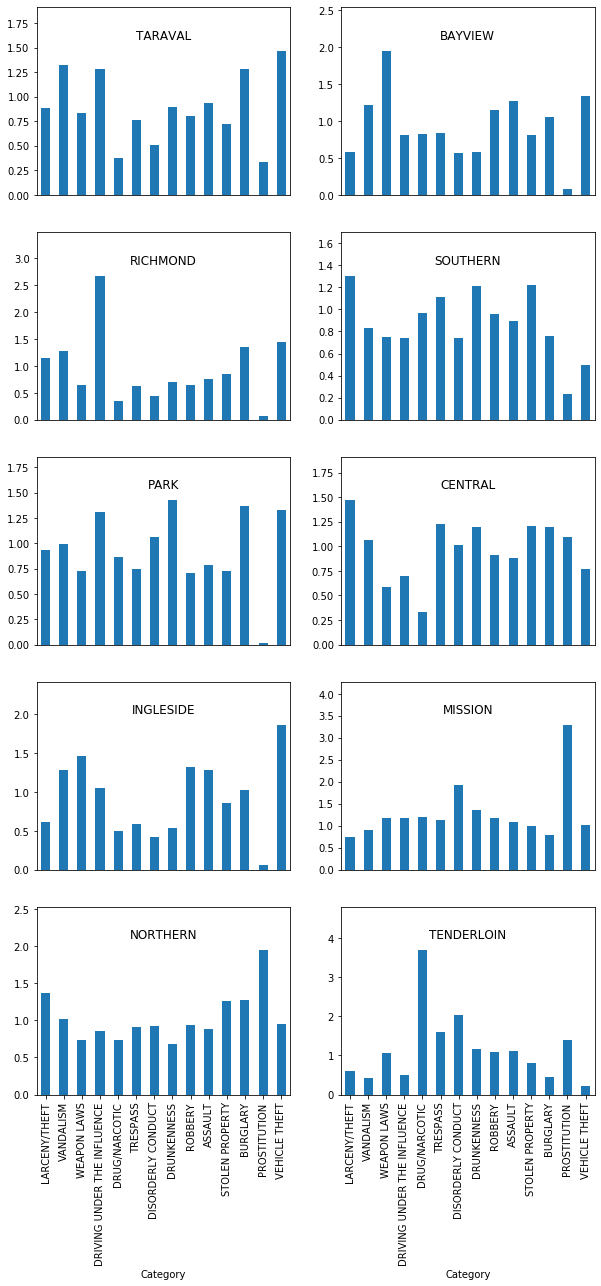

In [180]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))
for i, dist in enumerate(pddistricts):
    axi=axes[i%5, i%2]
    if i%5 != 4:
        axi.axes.get_xaxis().set_visible(False)
    #axi.set_xticklabels(months)
    axi.set_title(dist, y=0.80)
    axi.margins(y=0.3)
    (pcrimedist[dist].filter(focuscrimes)\
                      /pcrime.filter(focuscrimes))\
                      .plot(ax=axi, kind='bar')